In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd

In [2]:
# Load the data:
df = pd.read_csv('https://bit.ly/3EdQrai')

# Assign the current date:
current_date = pd.to_datetime('8/25/2023')

# Convert "Birthday" column to datetime:
df['Birthday'] = pd.to_datetime(df['Birthday'])

# Make a new "Age" column in years:
df['Age'] = ((current_date - df['Birthday']).dt.days) / 365.25
df['Age'] = df['Age'].astype(int)

df.head(3)

,Name,Birthday,Party,Branch,Age
0,Aaron Bean,1967-01-25,R,House,56
1,Abigail Spanberger,1979-08-07,D,House,44
2,Adam Schiff,1960-06-22,D,House,63


In [3]:
# Load the US population data for July 2023:
df_popl = pd.read_csv('https://bit.ly/3Po0Syf').astype(int)
display(df_popl)

,Age,Population
0,0,3684117
1,1,3702045
2,2,3607008
3,3,3710782
4,4,3759544
...,...,...
96,96,153943
97,97,112219
98,98,82901
99,99,57468


In [4]:
# Calculate the cumulative sum of the population over 24 years:
df_popl = df_popl[df_popl['Age'] >= 25].copy()
df_popl['Cumulative_Population'] = df_popl['Population'].cumsum()

# Find the total population:
total_population = df_popl['Population'].sum()

# Find row where the cumulative population crosses half the total population:
median_row = df_popl[df_popl['Cumulative_Population'] 
                     >= total_population / 2].iloc[0]

# Get the median age:
popl_median_age = median_row['Age']

# Get the median population:
popl_median = total_population / 2

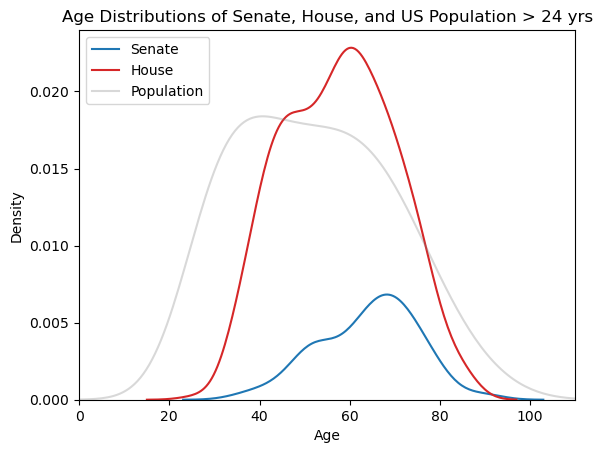

In [5]:
# Make a list of median member ages by branch of government:
median_ages = df.groupby('Branch')['Age'].median()

# Make a custom (red-blue-gray) color palette (optional):
colors = ['#d62728', '#1f77b4', '#7f7f7f']
sns.set_palette(sns.color_palette(colors))

# Plot Congressional ages as a KDE and overlay with population KDE:
fig, ax = plt.subplots()

sns.kdeplot(data=df, 
            x='Age', 
            hue='Branch', 
            multiple='layer', 
            common_norm=True)

sns.kdeplot(df_popl, 
            x='Age', 
            weights='Population', 
            color='grey', 
            alpha=0.3, 
            legend=False, 
            multiple='layer')

ax.set_title('Age Distributions of Senate, House, and US Population > 24 yrs')
ax.legend(loc='upper left', labels=['Senate', 'House', 'Population'])
ax.set_xlim((0, 110));

In [6]:
# Filter the DataFrame to each branch of government:
df_house = df.loc[df['Branch'] == 'House'].copy()
df_senate = df.loc[df['Branch'] == 'Senate'].copy()

# Find the median age values for each branch:
median_house = int(df_house['Age'].median())
median_senate = int(df_senate['Age'].median())

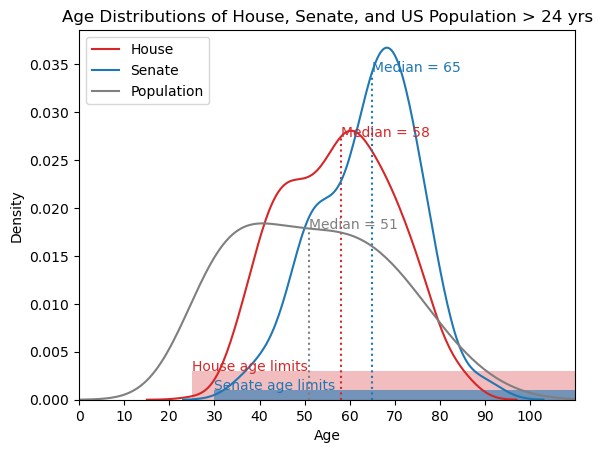

In [7]:
# Create figure and title:
fig, ax = plt.subplots()
ax.set_xlim((0, 110))
ax.set_xticks(range(0, 110, 10))
ax.set_title('Age Distributions of House, Senate, and US Population > 24 yrs')

# Define colors and labels:
colors = ['#d62728', '#1f77b4', '#7f7f7f']
labels = ['House', 'Senate', 'Population']

# Loop through the datasets and plot KDE, median lines, and labels:
datasets = [df_house, df_senate]
medians = [median_house, median_senate]

for i, (data, color, label) in enumerate(zip(datasets, colors, labels)):
    sns.kdeplot(data=data, x='Age', color=color, fill=False, label=label)
    x, y = ax.get_lines()[i].get_data()
    f = np.interp(medians[i], x, y)
    ax.vlines(x=medians[i], ymin=0, ymax=f, ls=':', color=color)
    ax.text(x=medians[i], y=f, s=f'Median = {medians[i]}', color=color)
    
# Make and annotate the population KDE plot:
sns.kdeplot(df_popl, x='Age', weights='Population', color='#7f7f7f', fill=False)
x, y = ax.get_lines()[2].get_data()  # Note that this is the 3rd line([2]).
f = np.interp(popl_median_age, x, y)
ax.vlines(x=popl_median_age, ymin=0, ymax=f, ls=':', color='#7f7f7f')
ax.text(x=popl_median_age, y=f, 
        s=f'Median = {popl_median_age}', color='#7f7f7f')

# Build a custom legend:
legend_handles = [Line2D(xdata=[0, 1], ydata=[0, 1], ls='-', 
                         color=color) for color in colors]
ax.legend(handles=legend_handles, loc='upper left', labels=labels)

# Manually annotate the Age Limit shading:
age_limit_rects = [
    Rectangle((25, 0), 85, 0.003, facecolor='#d62728', alpha=0.3),
    Rectangle((30, 0), 85, 0.001, facecolor='#1f77b4', alpha=0.6)
    ]

for age_rect, label, color in zip(
    age_limit_rects, ['House age limits', 'Senate age limits'], 
    ['#d62728', '#1f77b4']):
    age_rect.set_zorder(0)  # Move rect below other elements.
    ax.add_patch(age_rect)
    ax.text(x=age_rect.get_x(), y=age_rect.get_height(), 
            s=label, color=color)